In [1]:
# Introduction to Artificial Neural Networks with Keras

# First we will look at the MLP architecture
# Secondly we will see how to implement an ANN using keras API

# ANN's work better than most other methods on extremely large data sets
# They hardly ever get stuck in local optima
# Neural networks are where the money is as they sound cool to general public.

# ANN's are simple in idea but with vast data and large amounts of "neurons" we create extremely complex systems
# (just like Wolfram Physics)

# Lets try what is called perceptron learning using sckit - learn

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:, (2, 3)]  # petal length, petal width
y = (iris.target == 0).astype(np.int)

per_clf = Perceptron(max_iter=100, tol=-np.infty, random_state=42)
per_clf.fit(X, y)

y_pred = per_clf.predict([[2, 0.5]])

In [2]:
y_pred

array([1])

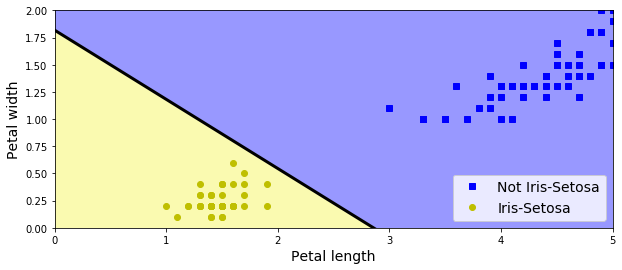

In [3]:
a = -per_clf.coef_[0][0] / per_clf.coef_[0][1]
b = -per_clf.intercept_ / per_clf.coef_[0][1]

axes = [0, 5, 0, 2]

x0, x1 = np.meshgrid(
        np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
        np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
y_predict = per_clf.predict(X_new)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs", label="Not Iris-Setosa")
plt.plot(X[y==1, 0], X[y==1, 1], "yo", label="Iris-Setosa")

plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], "k-", linewidth=3)
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="lower right", fontsize=14)
plt.axis(axes)

plt.show()

In [4]:
# The main weakness of perceptrons is that they struggle to solve simple probelms
# The solution was the creation of "hidden layers", or repeating the process of perceptrons more than once

In [5]:
# Multilayer Perceptron and Backpropagation


# A MLP is composed of one input layer. one or more layers of TLU's known as hidden layers and finally another
# TLU layer that is the output layer. (layers close to input = lower layer, close to output = upper layers)
# every layer accept the output has what is known as a bias neuron and is fully connected to the next layer
# When a ANN contains many hidden layers then this is called deep learning. (neural networks approx= deep learning)

In [6]:
# There was trouble originally training ANN's until backpropagation was purposed. It is gradient decent using
# an eficient technique for computing the gradients automatically. Once it has the grads it can perform normal 
# grad decent and repeat until we have a solution the model converges to.

In [2]:
# Activation Functions:

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)

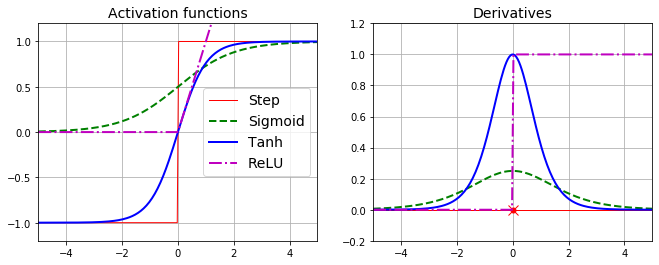

In [3]:
z = np.linspace(-5, 5, 200)

plt.figure(figsize=(11,4))

plt.subplot(121)
plt.plot(z, np.sign(z), "r-", linewidth=1, label="Step")
plt.plot(z, sigmoid(z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, np.tanh(z), "b-", linewidth=2, label="Tanh")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.legend(loc="center right", fontsize=14)
plt.title("Activation functions", fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])

plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=1, label="Step")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(sigmoid, z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=2, label="Tanh")
plt.plot(z, derivative(relu, z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
#plt.legend(loc="center right", fontsize=14)
plt.title("Derivatives", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

plt.show()

In [4]:
# MNIST Classification using the estimator API

import tensorflow as tf
from tensorflow import keras

In [5]:
# in this section we will tackle the fashion MNIST whihc is a drop in replacement for MNIST. Instead of numbers,
# the images represent fashion items, each class is more diverse by significantly harder.

fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [6]:
X_train_full.shape, X_train_full.dtype

((60000, 28, 28), dtype('uint8'))

In [7]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.0

In [8]:
class_names = ["Top", "Trousers", "Pullover", "Dress", "Coat", "Sandals", "Shirt", "Trainers", "Bag", "Boots"]

In [8]:
class_names[y_train[0]]

'Coat'

In [40]:
# Creating a model using the Sequential API

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [15]:
# Goinging through the code line by line above

# makes a sequential model (simplest keras model)
# input layer, preprocessing our input with reshape
# hidden layer, 300 neurons. Uses the ReLU activation function
# hidden layer, 100 neurons. Uses ReLU
# Output, 10 neurons, 1 per class using the softmax activation fuction

In [16]:
# Adding each layer one by one as we just did is time consuming and boring
# We can instead pass a list of layers when creating the Sequential Model

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [18]:
# Dense layers have a lot of parameters, this could lead to overfitting, especially wiht not much trainging data.
# We will come back to this later

model.layers

In [19]:
hidden1 = model.layers[1]

In [20]:
hidden1.name

'dense'

In [21]:
model.get_layer('dense') is hidden1

True

In [22]:
weights, biases = hidden1.get_weights()

In [23]:
weights

array([[ 0.04040064, -0.02291225,  0.01174735, ...,  0.02074113,
        -0.03952088,  0.04853158],
       [ 0.04824992, -0.00953738, -0.02602603, ..., -0.02050753,
         0.00164326,  0.05297916],
       [-0.06688707, -0.07120288, -0.01709865, ..., -0.05838411,
         0.02887952,  0.02464645],
       ...,
       [ 0.00222515,  0.00777996, -0.0191484 , ...,  0.01507459,
        -0.02367097, -0.05621997],
       [ 0.05206098,  0.01157372,  0.00462956, ...,  0.01735475,
         0.06829506,  0.01967683],
       [-0.01262295, -0.04636467,  0.07259734, ...,  0.0027817 ,
         0.05813682,  0.01473446]], dtype=float32)

In [24]:
weights.shape

(784, 300)

In [25]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [26]:
biases.shape

(300,)

In [27]:
# Weights are randomly connected to break symmetry
# Biases are intialised at zero
# We canuse different init methods by setting kernel_initializer or bias_initializer (chapter 11)

In [29]:
# Compliling a Model

# Once created, we must compile a model, we can specify extra metrics to compute during training:

model.compile(loss="sparse_categorical_crossentropy",
             optimizer="sgd",
             metrics=["accuracy"])

In [30]:
# Training and Evaluation of the Model

history = model.fit(X_train, y_train, epochs=30,
                   validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.9748 - accuracy: 0.6912 - val_loss: 0.4861 - val_accuracy: 0.8386
Epoch 2/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4986 - accuracy: 0.8263 - val_loss: 0.4816 - val_accuracy: 0.8242
Epoch 3/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4476 - accuracy: 0.8429 - val_loss: 0.4170 - val_accuracy: 0.8590
Epoch 4/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4192 - accuracy: 0.8545 - val_loss: 0.3852 - val_accuracy: 0.8672
Epoch 5/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3959 - accuracy: 0.8617 - val_loss: 0.3814 - val_accuracy: 0.8666
Epoch 6/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3733 - accuracy: 0.8672 - val_loss: 0.3909 - val_accuracy: 0.8594
Epoch 7/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3642 - accuracy: 0.8708 - val_loss: 0.3717 - val_accuracy:

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

NameError: name 'history' is not defined

In [33]:
# Great success, if we added more epochs the nn would only get better
# We could also tune hyper parameters to make the model better.

In [34]:
# We can now see how the model does against our test instances

model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 680us/step - loss: 0.3301 - accuracy: 0.8856


[0.3301181495189667, 0.8855999708175659]

In [35]:
# Not bad but with tuning we could do a lot better.

In [36]:
# Making Predictions

X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.98],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [38]:
# As we only care about the class with the highest probability then we canuse

y_pred = model.predict_classes(X_new)
y_pred

/Users/bencouser/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([9, 2, 1])

In [39]:
np.array(class_names)[y_pred]

array(['Boots', 'Pullover', 'Trousers'], dtype='<U8')

In [40]:
y_new = y_test[:3]

In [41]:
y_new

array([9, 2, 1], dtype=uint8)

In [42]:
# All correct, we have demonstraited how to use the sequential API to build, train, evaluate and use a 
# classifiaction MLP. Time for regression

In [10]:
# Building a Regression MLP Using the Sequential API

# Let us return to the california housing problem. For simplicity we will use a less complex version of the data than
# what was used in chapter 2

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full)

In [11]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [12]:
# The main difference  of our proceedings now for regression is that we only want a single output and uses no
# activation fuctio, adn the loss fuction is the mean squared error. The data is rather noisy and thus we will use
# a single hidden layer with fewer neurons to avoid overfitting

model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])

model.compile(loss="mean_squared_error", optimizer="sgd")

history = model.fit(X_train, y_train, epochs=50,
                   validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/50
363/363 [==============================] - 1s 1ms/step - loss: 1.6809 - val_loss: 0.5554
Epoch 2/50
363/363 [==============================] - 0s 726us/step - loss: 0.5528 - val_loss: 0.4653
Epoch 3/50
363/363 [==============================] - 0s 732us/step - loss: 0.5020 - val_loss: 0.4409
Epoch 4/50
363/363 [==============================] - 0s 685us/step - loss: 0.4641 - val_loss: 0.4470
Epoch 5/50
363/363 [==============================] - 0s 667us/step - loss: 0.4785 - val_loss: 0.4460
Epoch 6/50
363/363 [==============================] - 0s 658us/step - loss: 0.4560 - val_loss: 0.4135
Epoch 7/50
363/363 [==============================] - 0s 644us/step - loss: 0.4304 - val_loss: 0.4066
Epoch 8/50
363/363 [==============================] - 0s 648us/step - loss: 0.4163 - val_loss: 0.3997
Epoch 9/50
363/363 [==============================] - 0s 715us/step - loss: 0.4056 - val_loss: 0.3954
Epoch 10/50
363/363 [==============================] - 0s 726us/step - loss: 0.4082 

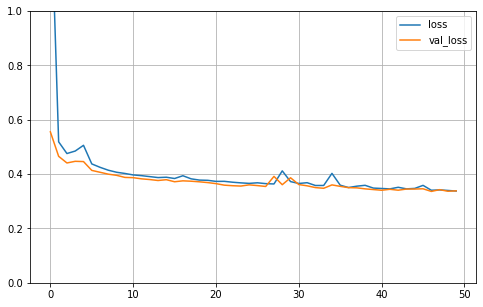

In [13]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [14]:
y_pred

array([[3.6911154],
       [3.311048 ],
       [1.2362838]], dtype=float32)

In [15]:
# Building Complex Models Using the Fuctional API

# One example of non-sequential NN's is a Wide & Deep neural network. Here we connect all the input parts directly
# to the output layer. It lets networks learn both deep and simple patterns. (we dont always need 100 layers for 
# some features)
# let's once again build a nn to study the california data

input_ = keras.layers.Input(shape=X_train.shape[:1])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs=[input_], outputs=[output])

In [16]:
# Let us go through the lines of code once again

# first line we make an input object, we specify the type of input that we will expect to have ( shape and dtype)
# hidden layer, of 30 neurons, relu, we call it like a fuction and that is why we call it functional api
# hideden layer 2
# concatenate layer
# output, only a single neuron which will be our output
# We create the model

In [17]:
# from here we repeat the same process as before and like the book i do not want to repeat the steps

In [18]:
# We dont need just one input, we can send a subset straight to the concat layer 

input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.Concatenate()([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.Model(inputs=[input_A, input_B], outputs=[output])

In [19]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
                   validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 3.1037 - val_loss: 0.8086
Epoch 2/20
363/363 [==============================] - 0s 748us/step - loss: 0.8074 - val_loss: 0.6692
Epoch 3/20
363/363 [==============================] - 0s 787us/step - loss: 0.6846 - val_loss: 0.6259
Epoch 4/20
363/363 [==============================] - 0s 743us/step - loss: 0.6343 - val_loss: 0.5986
Epoch 5/20
363/363 [==============================] - 0s 742us/step - loss: 0.6093 - val_loss: 0.5787
Epoch 6/20
363/363 [==============================] - 0s 731us/step - loss: 0.5942 - val_loss: 0.5625
Epoch 7/20
363/363 [==============================] - 0s 739us/step - loss: 0.5870 - val_loss: 0.5498
Epoch 8/20
363/363 [==============================] - 0s 734us/step - loss: 0.5421 - val_loss: 0.5386
Epoch 9/20
363/363 [==============================] - 0s 713us/step - loss: 0.5356 - val_loss: 0.5302
Epoch 10/20
363/363 [==============================] - 0s 711us/step - loss: 0.5485 

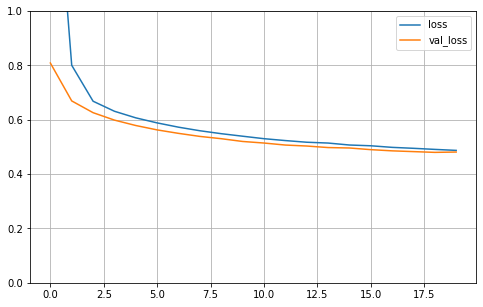

In [20]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [21]:
# There are many cases when you may want more than just one output
# Adding these extra outputs is suprisingly easy, we just need to connect them to the appropriate layers

In [22]:
# We dont need just one input, we can send a subset straight to the concat layer 

input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.Concatenate()([input_A, hidden2])
output = keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)
model = keras.Model(inputs=[input_A, input_B], outputs=[output, aux_output])

In [23]:
# each output wil need its own loss function. Thus when we compile the model we should pass a list of losses.

model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer="sgd")

In [24]:
history = model.fit(
    [X_train_A, X_train_B], [y_train, y_train], epochs=20,
    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 1.3863 - main_output_loss: 1.3017 - aux_output_loss: 2.1471 - val_loss: 0.5552 - val_main_output_loss: 0.4990 - val_aux_output_loss: 1.0607
Epoch 2/20
363/363 [==============================] - 0s 883us/step - loss: 1.8242 - main_output_loss: 1.8814 - aux_output_loss: 1.3093 - val_loss: 0.5287 - val_main_output_loss: 0.4846 - val_aux_output_loss: 0.9250
Epoch 3/20
363/363 [==============================] - 0s 892us/step - loss: 0.5608 - main_output_loss: 0.5215 - aux_output_loss: 0.9150 - val_loss: 0.4871 - val_main_output_loss: 0.4511 - val_aux_output_loss: 0.8112
Epoch 4/20
363/363 [==============================] - 0s 901us/step - loss: 0.4990 - main_output_loss: 0.4645 - aux_output_loss: 0.8094 - val_loss: 0.5235 - val_main_output_loss: 0.4997 - val_aux_output_loss: 0.7381
Epoch 5/20
363/363 [==============================] - 0s 855us/step - loss: 0.4689 - main_output_loss: 0.4403 - aux_output_loss: 0.7266 - 

In [25]:
total_loss, main_loss, aux_loss = model.evaluate(
    [X_test_A, X_test_B], [y_test, y_test])

162/162 [==============================] - 0s 544us/step - loss: 0.3888 - main_output_loss: 0.3752 - aux_output_loss: 0.5109


In [26]:
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

In [27]:
y_pred_main, y_pred_aux

(array([[3.3630772],
        [3.2470121],
        [1.035368 ]], dtype=float32),
 array([[2.9698467],
        [3.456244 ],
        [1.0497015]], dtype=float32))

In [31]:
# Using the Subclassing API to Build Dynamic Models

# Both sequential api and functional api are declarative; you begin by declaring the layers you want and how they 
# connect. The advantages of this is that we can easily save the model, clone and share. The disadvantage to this
# is that it is static. Some times we may want loops, varying shapes, conditional branches and all other kinds of
# dynamic behaviour. This is when the Subclassing api comes in.
# We simply subclass the model class, create the layers you need in the constructor and use them in the call() method

# Let's make a an instance of the following WideAndDeepModel class that gives us an equivalent model to the one we just
# built

class WideAndDeepModel(keras.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs) # handles standard arguments
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
        
    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output
    
model = WideAndDeepModel

In [32]:
# This is very similar to the functional api accept we do not need to create inputs, we can simply use the input
# argument in the call method. The downside is that you cannot save your model as keras can't look within call()

# Now that we can make neural networks we need to know how to save them...